In [1]:
# Classification

# Using the Titanic dataset with target variable “Survived”, 
# extract one classification model for each of the following approaches: 
# kNN, SVM, Neural Networks, Naive Bayes. 

# For at least one of them, perform a search to select the parameters 
# that optimize accuracy. 

# For all the others, simply choose reasonable parameters values. 

# After dividing the dataset in training and test sets, 
# provide for all the models the confusion matrix, accuracy, 
# precision & recall for the positive class.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def clean_data(df, drop_passenger_id):
    
    # Get the unique values of Sex
    sexes = sorted(df['Sex'].unique())
    
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Get the unique values of Embarked
    embarked_locs = sorted(df['Embarked'].fillna('S').unique())

    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, 
                                     range(0, len(embarked_locs) + 1)))
    
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    df['Fare'].fillna(df['Fare'].mean())
    
    # To keep Age intact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

In [2]:
df_train = pd.read_csv("titanic_train.csv") 
df_train = clean_data(df_train, drop_passenger_id=True)

# Convert the DataFrame to a numpy array:
train_data = df_train.values

# Training data features, skip the first column 'Survived'
X = train_data[:, 1:]

# 'Survived' column values
y = train_data[:, 0]

# Dividing the dataset in training and test sets 
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=0)

[[95 15]
 [34 35]]
              precision    recall  f1-score   support

Not Survived       0.74      0.86      0.79       110
    Survived       0.70      0.51      0.59        69

 avg / total       0.72      0.73      0.72       179

[[107   3]
 [ 61   8]]
              precision    recall  f1-score   support

Not Survived       0.64      0.97      0.77       110
    Survived       0.73      0.12      0.20        69

 avg / total       0.67      0.64      0.55       179

[[99 11]
 [24 45]]
              precision    recall  f1-score   support

Not Survived       0.80      0.90      0.85       110
    Survived       0.80      0.65      0.72        69

 avg / total       0.80      0.80      0.80       179

[[91 19]
 [15 54]]
              precision    recall  f1-score   support

Not Survived       0.86      0.83      0.84       110
    Survived       0.74      0.78      0.76        69

 avg / total       0.81      0.81      0.81       179



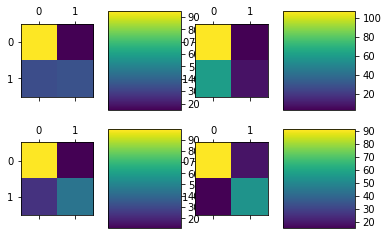

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from mpl_toolkits.axes_grid1 import make_axes_locatable

names = ["Nearest Neighbors", #"Linear SVM",
         "RBF SVM", "Neural Net", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    MLPClassifier(alpha=1),
    GaussianNB()
]



# Iterate over classifiers
for (ax, cax), name, clf in zip([(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)], names, classifiers):
    clf.fit(train_x, train_y)
    test_pred = clf.predict(test_x)
    score = clf.score(test_x, test_y)
    cm = confusion_matrix(test_y, test_pred)
    print(cm)    
    print(classification_report(test_y, 
                            test_pred, 
                            target_names=['Not Survived', 'Survived']))
    
    plt.close('all')
    im = ax.matshow(cm)
    plt.colorbar(im, cax=cax, use_gridspec=True)
    




plt.show()

In [11]:
make_axes_locatable??